<a href="https://colab.research.google.com/github/lualua0909/DeepLearning-LDS8/blob/main/Week_3/demo_dog_cat_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the Keras libraries and other packages
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from datetime import datetime
import pandas as pd
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.models import load_model

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
tf.__version__

'2.6.0'

In [4]:
keras.__version__

'2.6.0'

##**Initializing the CNN**

In [5]:
classifier = Sequential()

##**Step 1: Convolution**

In [6]:
classifier.add(Conv2D(filters=32, kernel_size=3, input_shape=(64, 64, 3), activation='relu'))

##**Step 2: Pooling**

In [7]:
classifier.add(MaxPooling2D(pool_size=(2, 2)))

##**Adding second convolutional layer**

In [8]:
classifier.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

##**Step 3: Flattening**

In [9]:
classifier.add(Flatten())

##**Fully connection**

In [10]:
classes = ['dogs', 'cats']

In [11]:
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=len(classes), activation='softmax'))

In [12]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

##**Compiling the CNN**

In [13]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##**Read and pre-process image**

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
trainning_set = train_datagen.flow_from_directory(directory='/content/gdrive/MyDrive/dataset_dog_cat/training_set',
                                                  target_size=(64, 64),
                                                  classes=classes,
                                                  class_mode='categorical')

Found 200 images belonging to 2 classes.


In [18]:
test_set = test_datagen.flow_from_directory(directory='/content/gdrive/MyDrive/dataset_dog_cat/test_set',
                                            target_size=(64, 64),
                                            classes=classes,
                                            class_mode='categorical')

Found 100 images belonging to 2 classes.


In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=20),
              ModelCheckpoint('model_checkpoint_20082021.h5', save_best_only=True)]

In [20]:
history = classifier.fit(trainning_set, epochs=10, validation_data=test_set, callbacks=callbacks)

Epoch 1/10
7/7 [==============================] - 89s 9s/step - loss: 0.8041 - accuracy: 0.4300 - val_loss: 0.6978 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 2s 257ms/step - loss: 0.6950 - accuracy: 0.5050 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 2s 256ms/step - loss: 0.6917 - accuracy: 0.5000 - val_loss: 0.6915 - val_accuracy: 0.5100
Epoch 4/10
7/7 [==============================] - 2s 255ms/step - loss: 0.6896 - accuracy: 0.5500 - val_loss: 0.6915 - val_accuracy: 0.5400
Epoch 5/10
7/7 [==============================] - 2s 255ms/step - loss: 0.6841 - accuracy: 0.6000 - val_loss: 0.6844 - val_accuracy: 0.5800
Epoch 6/10
7/7 [==============================] - 2s 251ms/step - loss: 0.6894 - accuracy: 0.5300 - val_loss: 0.6767 - val_accuracy: 0.6500
Epoch 7/10
7/7 [==============================] - 2s 250ms/step - loss: 0.6740 - accuracy: 0.5850 - val_loss: 0.6874 - val_accuracy: 0.5600
Epoch 8/10
7/7 [======

In [21]:
import pandas as pd

history_frame = pd.DataFrame(history.history)

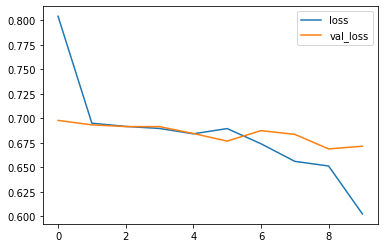

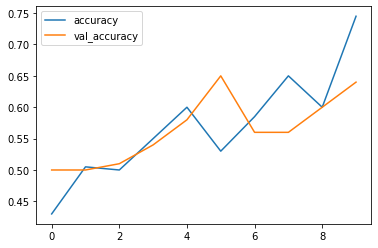

In [22]:
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

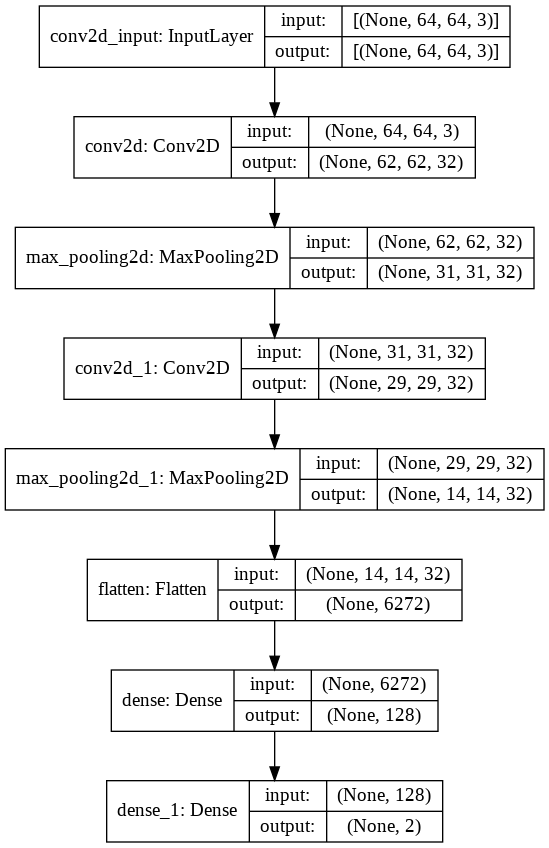

In [23]:
from tensorflow.keras.utils import plot_model

plot_model(classifier, to_file='CNN_model.png', show_shapes=True)

In [24]:
from tensorflow.keras.models import load_model
classifier.save('dog_cat_cnn_model.h5')

In [25]:
def read_process_img(url):
  import matplotlib.pyplot as plt   
  plt.imshow(plt.imread(url, format='jpeg'))
  test_img = image.load_img(url, target_size=(64, 64))
  test_img = image.img_to_array(test_img) / 255
  return np.expand_dims(test_img, axis=0)

In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image

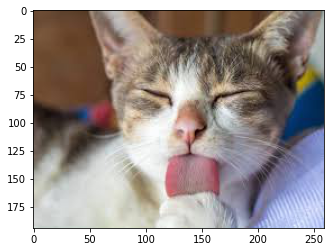

In [27]:
url = '/content/gdrive/MyDrive/dataset_dog_cat_CNN/single_prediction/cat_or_dog_3.jpg'
test_img = read_process_img(url)

In [28]:
result = classifier.predict(test_img)
result

array([[0.45784202, 0.54215795]], dtype=float32)

In [29]:
index = np.argmax(result)
classes[index]

'cats'

In [30]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = './' + fn
  img = image.load_img(path, target_size=(64, 64))
  test_img = image.img_to_array(img) / 255
  x = np.expand_dims(test_img, axis=0)

  images = np.vstack([x])
  result = classifier.predict(images, batch_size=10)
  index = np.argmax(result)
  print(classes[index])

Saving mua-vet-o-dau.png to mua-vet-o-dau.png
cats


In [31]:
classifier.layers

In [35]:
output_layers = [layer.output for layer in classifier.layers]
output_layers

[<KerasTensor: shape=(None, 62, 62, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 31, 31, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 29, 29, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 6272) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_1')>]

Saving 250388774_576194946992042_7627843573105084150_n.jpeg to 250388774_576194946992042_7627843573105084150_n (1).jpeg
(1, 64, 64, 3)


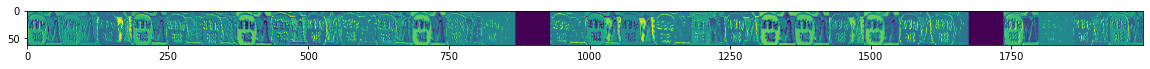

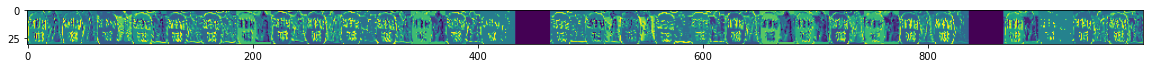

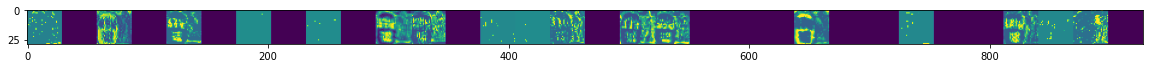

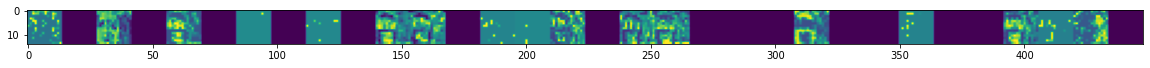

In [42]:
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
  path = './' + fn
  img = image.load_img(path, target_size=(64, 64))
  x = image.img_to_array(img) / 255
  x = x.reshape((1,) + x.shape)
  
  print(x.shape)

  visualization_model = tf.keras.models.Model(inputs=classifier.input, outputs=output_layers)
  successive_feature_map = visualization_model.predict(x)
  layer_names = [layer.name for layer in classifier.layers]
  for layer_names, feature_map in zip(layer_names, successive_feature_map):
    if len(feature_map.shape) == 4:
      n_features = feature_map.shape[-1]
      size = feature_map.shape[1]
      display_grid = np.zeros((size, size * n_features))
      for i in range(n_features):
        x = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = x
      
      scale = 20. / n_features
      plt.figure(figsize=(scale * n_features, scale))
      plt.title('')
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')
